# Active learning

## Setup Enviroment

### Import packages

In [1]:
# Datatypes
import numpy as np

In [2]:
# Active Learner
from modAL.models import ActiveLearner

In [3]:
# Plots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
# Copy
from copy import deepcopy

In [5]:
# Dataset
from sklearn.datasets import load_iris

iris = load_iris()

In [6]:
# PCA to print dataset
from sklearn.decomposition import PCA

In [7]:
# Algoritms

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Random Forest

# SVM

### Variables

In [8]:
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)

k_neighbor = [1, 3, 5, 7, 13]
N_QUERIES = 20
performance_history_total = []
is_correct = []

## Framework

### Dataset insights

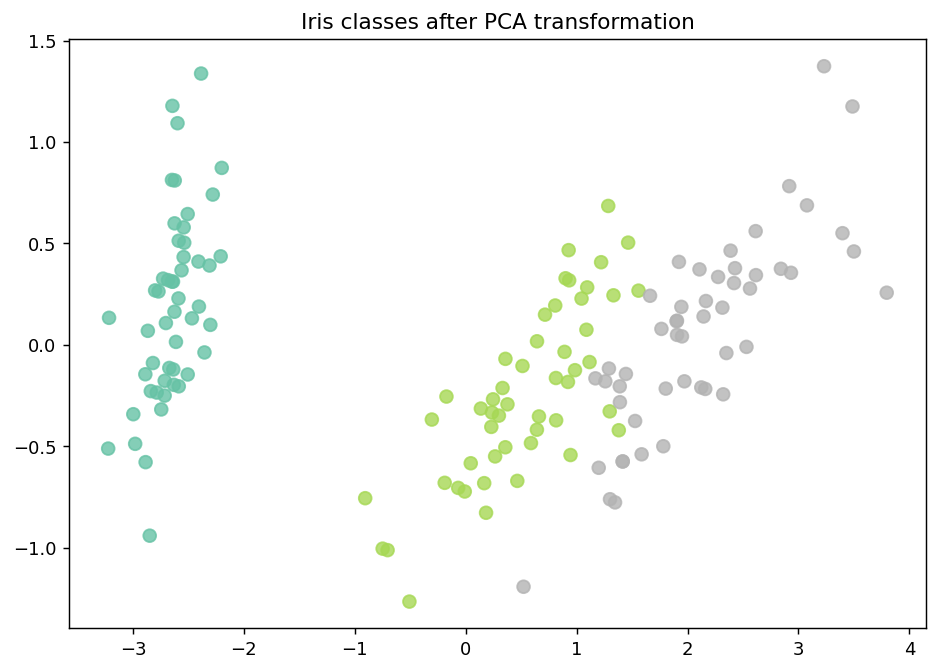

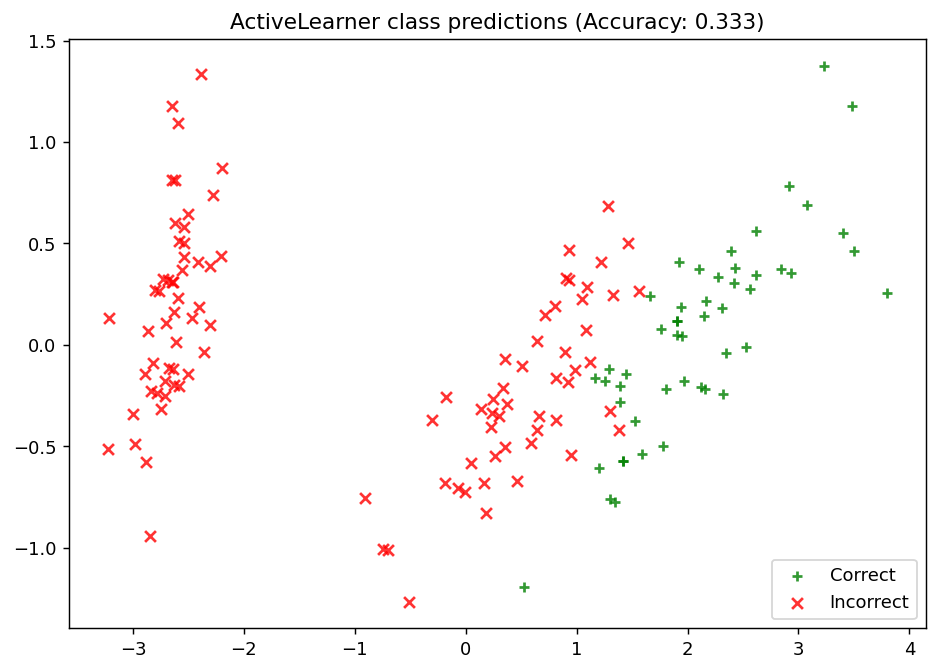

In [9]:
iris = load_iris()
X_raw = iris['data']
y_raw = iris['target']

pca = PCA(n_components=2, random_state=RANDOM_STATE_SEED)
transformed_iris = pca.fit_transform(X=X_raw)

x_component, y_component = transformed_iris[:, 0], transformed_iris[:, 1]

# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x=x_component, y=y_component, c=y_raw, cmap='Set2', s=50, alpha=8/10)
plt.title('Iris classes after PCA transformation')
plt.show()

# Isolate our examples for our labeled dataset.
n_labeled_examples = X_raw.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_train = X_raw[training_indices]
y_train = y_raw[training_indices]

# Isolate the non-training examples we'll be querying.
X_pool = np.delete(X_raw, training_indices, axis=0)
y_pool = np.delete(y_raw, training_indices, axis=0)

# Specify our core estimator along with it's active learning model.
knn = KNeighborsClassifier(n_neighbors=3)
learner = ActiveLearner(estimator=knn, X_training=X_train, y_training=y_train)

pred = learner.predict(X_raw)
is_cor = (pred == y_raw)

# Record our learner's score on the raw data.
unqueried_score = learner.score(X_raw, y_raw)

# Plot our classification results.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.scatter(x=x_component[is_cor],  y=y_component[is_cor],  c='g', marker='+', label='Correct',   alpha=8/10)
ax.scatter(x=x_component[~is_cor], y=y_component[~is_cor], c='r', marker='x', label='Incorrect', alpha=8/10)
ax.legend(loc='lower right')
ax.set_title("ActiveLearner class predictions (Accuracy: {score:.3f})".format(score=unqueried_score))
plt.show()

### KNN increment

In [10]:
for k in k_neighbor:
    
    X_raw = deepcopy(iris['data'])
    y_raw = deepcopy(iris['target'])

    # Isolate our examples for our labeled dataset.
    n_labeled_examples = X_raw.shape[0]
    training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=k)

    X_train = X_raw[training_indices]
    y_train = y_raw[training_indices]

    # Isolate the non-training examples we'll be querying.
    X_pool = np.delete(X_raw, training_indices, axis=0)
    y_pool = np.delete(y_raw, training_indices, axis=0)
    
    
    # Specify our core estimator along with it's active learning model.
    knn = KNeighborsClassifier(n_neighbors=k)
    learner = ActiveLearner(estimator=knn, X_training=X_train, y_training=y_train)
    
    unqueried_score = learner.score(X_raw, y_raw)

    print("loop k = ", k, "\n")
    performance_history = [unqueried_score]

    # Allow our model to query our unlabeled dataset for the most
    # informative points according to our query strategy (uncertainty sampling).
    for index in range(N_QUERIES):
      query_index, query_instance = learner.query(X_pool)

      # Teach our ActiveLearner model the record it has requested.
      X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
      learner.teach(X=X, y=y)

      # Remove the queried instance from the unlabeled pool.
      X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

      # Calculate and report our model's accuracy.
      model_accuracy = learner.score(X_raw, y_raw)
      print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

      # Save our model's performance for plotting.
      performance_history.append(model_accuracy)
    print("\n")
    
    predictions = learner.predict(X_raw)
    is_correct.append((predictions == y_raw))
    
    performance_history_total.append(performance_history)

loop k =  1 

Accuracy after query 1: 0.6667
Accuracy after query 2: 0.6667
Accuracy after query 3: 0.6667
Accuracy after query 4: 0.6667
Accuracy after query 5: 0.6667
Accuracy after query 6: 0.6667
Accuracy after query 7: 0.6667
Accuracy after query 8: 0.6667
Accuracy after query 9: 0.6667
Accuracy after query 10: 0.6667
Accuracy after query 11: 0.6667
Accuracy after query 12: 0.6667
Accuracy after query 13: 0.6667
Accuracy after query 14: 0.6667
Accuracy after query 15: 0.6667
Accuracy after query 16: 0.6667
Accuracy after query 17: 0.6667
Accuracy after query 18: 0.6667
Accuracy after query 19: 0.6667
Accuracy after query 20: 0.6667


loop k =  3 

Accuracy after query 1: 0.3333
Accuracy after query 2: 0.6467
Accuracy after query 3: 0.6600
Accuracy after query 4: 0.6667
Accuracy after query 5: 0.6667
Accuracy after query 6: 0.6667
Accuracy after query 7: 0.6667
Accuracy after query 8: 0.6667
Accuracy after query 9: 0.6667
Accuracy after query 10: 0.6667
Accuracy after query 11: 0.6

#### Visualizations

In [11]:
# Define our PCA transformer and fit it onto our raw dataset.
pca = PCA(n_components=2, random_state=RANDOM_STATE_SEED)
transformed_iris = pca.fit_transform(X=X_raw)

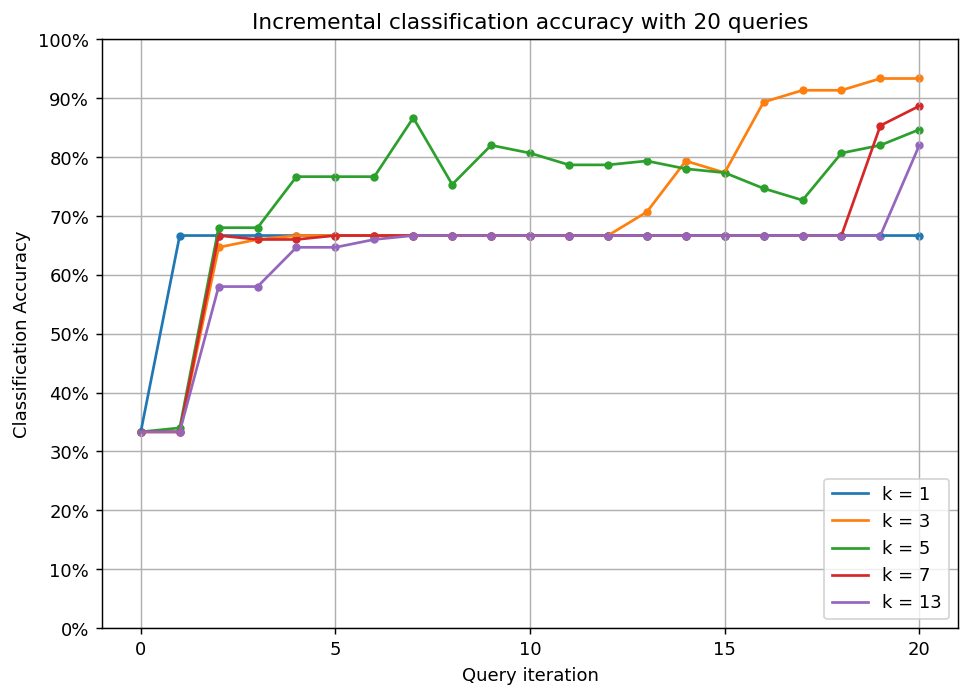

In [12]:
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)


k_legend = []
for idx,pht in enumerate(performance_history_total):
    ax.plot(pht)
    ax.scatter(range(len(pht)), pht, s=13)
    k_legend.append('k = ' + str(k_neighbor[idx]))

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title("Incremental classification accuracy with {n_queries} queries".format(n_queries = N_QUERIES))
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')
ax.legend(k_legend, loc='lower right')

plt.show()

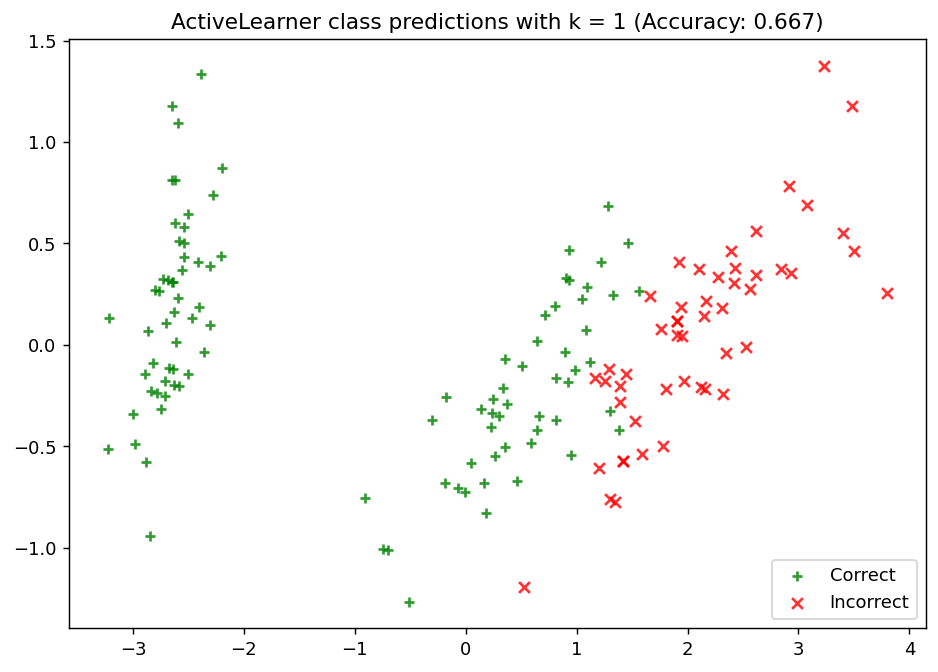

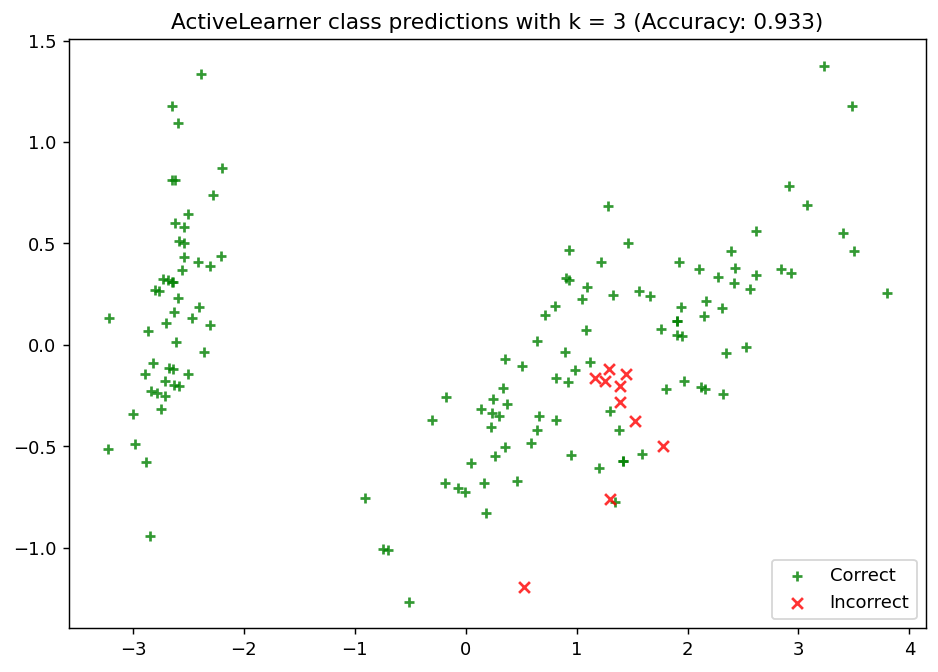

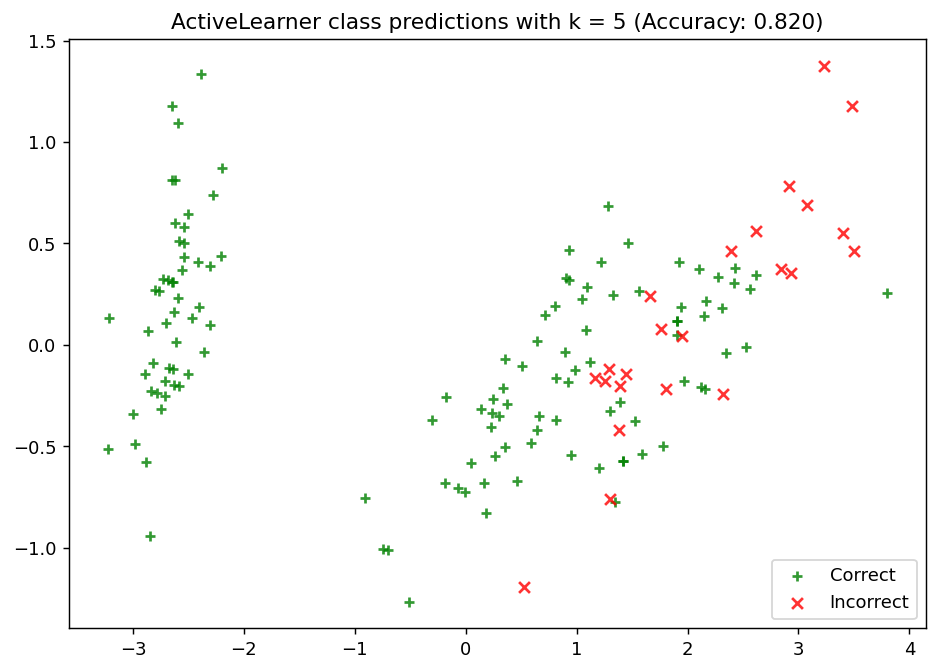

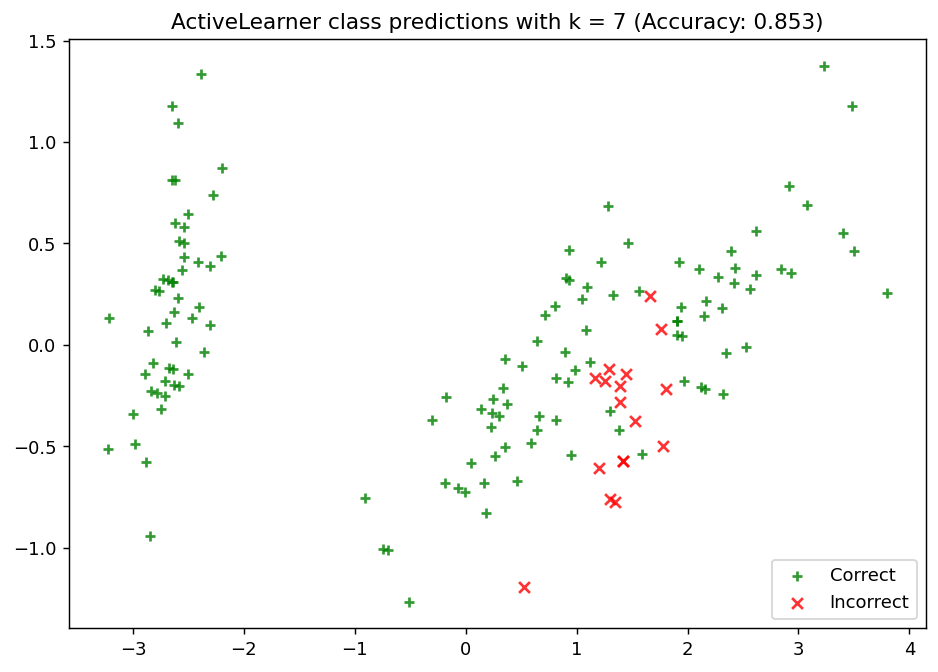

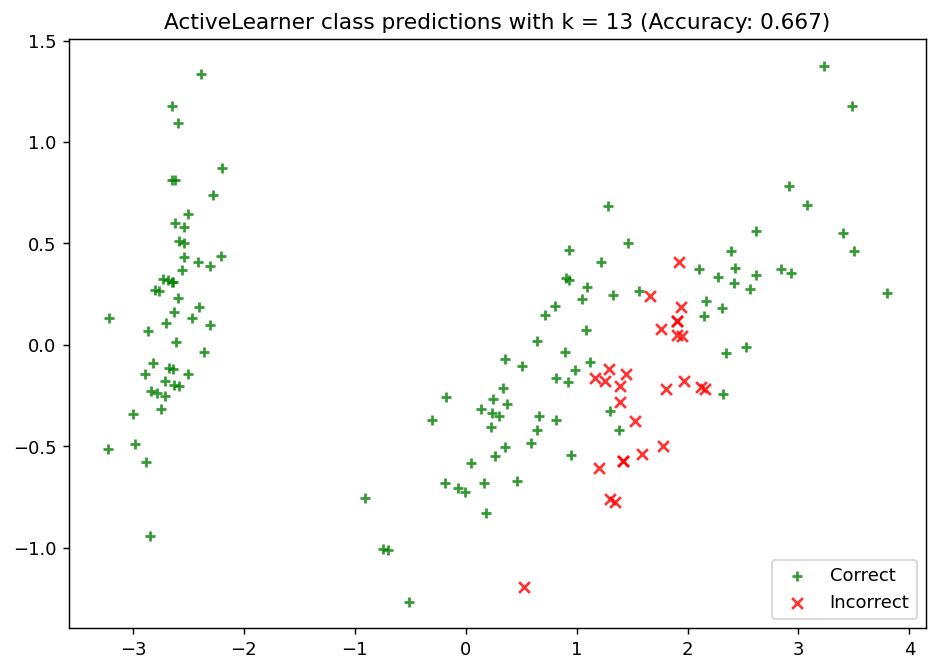

In [13]:
for idx,k in enumerate(k_neighbor):
    # Plot our classification results.
    fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
    ax.scatter(x=x_component[is_correct[idx]],  y=y_component[is_correct[idx]],  c='g', marker='+', label='Correct',   alpha=8/10)
    ax.scatter(x=x_component[~is_correct[idx]], y=y_component[~is_correct[idx]], c='r', marker='x', label='Incorrect', alpha=8/10)
    ax.legend(loc='lower right')
    ax.set_title("ActiveLearner class predictions with k = {k} (Accuracy: {score:.3f})".format(k = k, score=performance_history_total[idx][N_QUERIES-1]))
    plt.show()